### Y. Afisha

Se desea confeccionar un estudio para entender como los usuarios utilizan el producto, cuando empiezan a comprar, cuanta aportación trae cada cliente y en que momento es qué pagan. 

Este proyecto se enfoca en realizar un análisis preliminar con los datos que se tienen que corresponden al período desde enero 2017 a diciembre 20218. Datos, cuyos cuales, se encuentran distribuidos en 3 datasets que contienen información sobre los costos y/o gastos de marketing, sobre los pedidos del período y las visitas de los clientes al sitio web de la empresa.

La información proporcionada está distribuida en 3 datasets, con 2542, 50415 y 359400 registros respectivamente.

El objetivo principal es Optimizar los gastos de marketing de la empresa, entendiendo y caracterizando el comportamiento de los clientes, para a su vez, proveer de recomendaciones que les sirvan a los expertos en marketing, contribuyendo en definitiva a un mejor desempeño de la empresa y a la generación de mayores ingresos.

## Inicialización

In [85]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

from importlib import reload
plt=reload(plt)

In [86]:
# Carga el archivo de datos

df_marketing_cost = pd.read_csv('costs_us.csv')

# Para el momento de enviar el proyecto es de esta forma
#df_trips1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_01.csv')  

In [87]:
# Carga el archivo de datos

df_marketing_orders = pd.read_csv('orders_log_us.csv')

In [88]:
# Carga el archivo de datos

df_marketing_visits = pd.read_csv('visits_log_us.csv')

## Exploración_inicial

## Dataset 1

In [89]:
df_marketing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [90]:
df_marketing_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [91]:
df_marketing_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [92]:
df_marketing_cost.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [93]:
df_marketing_orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [94]:
df_marketing_visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [95]:
df_marketing_cost.shape

(2542, 3)

In [96]:
df_marketing_orders.shape

(50415, 3)

In [97]:
df_marketing_visits.shape

(359400, 5)

In [98]:
df_marketing_cost.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [99]:
df_marketing_orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [100]:
df_marketing_visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [101]:
df_marketing_cost.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [102]:
df_marketing_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [103]:
df_marketing_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


## Limpieza_y_Preparación_de_los_datos

### Verificación_y_corrección_de_los_tipos_de_datos

In [104]:
# Convirtiendo la feature de fecha al tipo de dato más adecuado, de tal manera que, siendo de tipo datetime se facilita el
#cálculo de las métricas.

df_marketing_cost['dt'] = pd.to_datetime(df_marketing_cost['dt'])

In [105]:
# Convirtiendo la feature de fecha al tipo de dato más adecuado, de tal manera que, siendo de tipo datetime se facilita el
#cálculo de las métricas. 

df_marketing_orders['Buy Ts'] = pd.to_datetime(df_marketing_orders['Buy Ts'])

In [106]:
# Convirtiendo la feature de fecha al tipo de dato más adecuado, de tal manera que, siendo de tipo datetime se facilita el
#cálculo de las métricas.

df_marketing_visits['Start Ts'] = pd.to_datetime(df_marketing_visits['Start Ts'])
df_marketing_visits['End Ts'] = pd.to_datetime(df_marketing_visits['End Ts'])

In [107]:
df_marketing_visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

In [108]:
df_marketing_visits['Device'] = df_marketing_visits['Device'].astype('category') 

In [109]:
df_marketing_visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

### Comprobando los tipos de datos convertidos

In [110]:
df_marketing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [111]:
df_marketing_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [112]:
df_marketing_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Conversión a minúsculas de los nombres de las features de los datos

In [113]:
# Se reemplazan por minúsculas TODOS los nombres de las columnas.

df_marketing_cost.columns = map(str.lower, df_marketing_cost.columns)
df_marketing_cost.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [323]:
df_marketing_cost['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [114]:
df_marketing_orders.columns = map(str.lower, df_marketing_orders.columns)
df_marketing_orders.head(5)

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [115]:
# Se reemplazan por minúsculas TODOS los nombres de las columnas.

df_marketing_visits.columns = map(str.lower, df_marketing_visits.columns)
df_marketing_visits.head(5)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [116]:
# Cambiando el nombre del encabezado "user_id"
df_marketing_orders.columns = df_marketing_orders.columns.str.replace('buy ts', 'buy_ts') 
df_marketing_orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [117]:
# Cambiando el nombre del encabezado "user_id"
df_marketing_visits.columns = df_marketing_visits.columns.str.replace('start ts', 'start_ts') 
df_marketing_visits.columns = df_marketing_visits.columns.str.replace('end ts', 'end_ts') 
df_marketing_visits.columns = df_marketing_visits.columns.str.replace('source id', 'source_id') 
df_marketing_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


### Revisión de la existencia de valores duplicados 

In [118]:
df_marketing_cost.duplicated().sum()

0

In [119]:
df_marketing_orders.duplicated().sum()

0

In [120]:
df_marketing_visits.duplicated().sum()

0

### Revisión de la existencia de valores faltantes 

In [121]:
df_marketing_cost.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [122]:
df_marketing_orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [123]:
df_marketing_visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

## Conclusión de la parte de limpieza y preparación de los datos

1- Se revisaron los 3 datasets encontrándose los siguientes problemas:

-existen 4 features de tipo fecha designadas como Object

-existe 1 feature de tipo categoría designada como Object 

-nombres de columnas que no están en minúsculas y están escritos con espacios

Acciones correspondientes realizadas:

1- Luego de la verificación del tipo de datos de las columnas, se convirtió la columna 'dt' al tipo datetime en dataset del costo, se convirtió la columna 'Buy Ts' al tipo datetime en dataset orders, y se convirtió las columnas 'Start Ts'  y 'End Ts' en dataset visits al tipo datetime. Además, fue convertido el feature 'Device' al tipo category que se ajusta mejor al tipo de dato que contiene, en el resto de las features se considera que conservan un tipo de dato adecuado. 

2- Se convirtieron a minúsculas todas las features y se retiraron los espacios intermedios en sus nombres para dejarlos todos de una manera homogénea.

3- Se verificó la existencia de filas con datos faltantes, sin encontrarse celda con valor NaN.

4- Se constató la no existencia de valores duplicados en los datos.

### Cálculo de métricas

In [124]:
df_marketing_cost.columns  #Index(['source_id', 'dt', 'costs'], dtype='object')

Index(['source_id', 'dt', 'costs'], dtype='object')

In [125]:
df_marketing_orders.columns # Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [126]:
 df_marketing_visits.columns #Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [127]:
#df_marketing_visits = df_marketing_visits 

In [128]:
# primera compra 
#first_purchase_dates = purchases.groupby('player_id')['purchase_datetime'].min()

#first_purchase_dates.name = 'first_purchase_datetime'

#orders = orders.join(first_order_date_by_customers,on='customer_id')

#print(first_purchase_dates.head(10)) 

### Producto

In [129]:
df_marketing_visits['date_start'] = df_marketing_visits['start_ts'].dt.date
system_used_per_day = df_marketing_visits.groupby('date_start')['uid'].count()

system_used_per_day

date_start
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: uid, Length: 364, dtype: int64

In [130]:
df_marketing_visits['start_ts'] = pd.to_datetime(df_marketing_visits['start_ts'])

df_marketing_visits['session_week'] = df_marketing_visits['start_ts'].dt.strftime("%W")
df_marketing_visits['year_start'] = df_marketing_visits['start_ts'].dt.year
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start'],
      dtype='object')

In [131]:
#users_data['session_week']  = users_data['session_start_ts'].dt.week

conditioning = (df_marketing_visits['year_start']== 2017 )
system_used_by_customers_per_week = df_marketing_visits[conditioning].groupby('session_week')['uid'].count()

system_used_by_customers_per_week 

session_week
22     2309
23     4931
24     3214
25     3273
26     3514
27     3822
28     5105
29     4574
30     3072
31     2729
32     2782
33     3128
34     3585
35     4296
36     5115
37     5011
38     5715
39     7315
40     8878
41     8317
42     8336
43     8712
44     8645
45     8287
46     9656
47    13572
48    10409
49    10298
50    10120
51     8500
52     9230
Name: uid, dtype: int64

In [132]:
conditioning = (df_marketing_visits['year_start']== 2018)
system_used_by_customers_per_week = df_marketing_visits[conditioning].groupby('session_week')['uid'].count()

system_used_by_customers_per_week 

session_week
01    8057
02    7871
03    8317
04    8488
05    9796
06    9407
07    9272
08    8930
09    8771
10    8147
11    7489
12    9393
13    5862
14    6242
15    6382
16    6768
17    6574
18    4496
19    4803
20    6094
21    5934
22    5857
Name: uid, dtype: int64

In [133]:
df_marketing_visits['month_start'] = df_marketing_visits['start_ts'].dt.month
#df_marketing_visits['year_start'] = df_marketing_visits['start_ts'].dt.year

conditioning = (df_marketing_visits['year_start']== 2017 )
system_used_per_month_2017 = df_marketing_visits[conditioning].groupby(['month_start', 'year_start'])['uid'].count()

system_used_per_month_2017

month_start  year_start
6            2017          16505
7            2017          17828
8            2017          14355
9            2017          23907
10           2017          37903
11           2017          43969
12           2017          41983
Name: uid, dtype: int64

In [134]:
conditioning = (df_marketing_visits['year_start']== 2018)
system_used_per_month_2018 = df_marketing_visits[conditioning].groupby(['month_start', 'year_start'])['uid'].count()

system_used_per_month_2018

month_start  year_start
1            2018          36939
2            2018          37182
3            2018          35679
4            2018          26515
5            2018          26635
Name: uid, dtype: int64

In [135]:
# Sesiones en un día o usuarios activos diarios

df_marketing_visits['session_date'] = df_marketing_visits['start_ts'].dt.day
dau_total = df_marketing_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

int(dau_total)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14824\1061802400.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(dau_total)


10241

In [136]:
# Duracion de cada sesion 
df_marketing_visits['end_ts'] =  pd.to_datetime(df_marketing_visits['end_ts'])
df_marketing_visits['start_ts'] = pd.to_datetime(df_marketing_visits['start_ts'])

df_marketing_visits['duration_session_min_end'] = df_marketing_visits['end_ts'].dt.strftime("%M")
df_marketing_visits['duration_session_min_end'] = df_marketing_visits['duration_session_min_end'].astype(int)
df_marketing_visits['duration_session_min_start'] = df_marketing_visits['start_ts'].dt.strftime("%M")
df_marketing_visits['duration_session_min_start'] = df_marketing_visits['duration_session_min_start'].astype(int)
df_marketing_visits['duration_session'] = df_marketing_visits['duration_session_min_end'] - df_marketing_visits['duration_session_min_start']

df_marketing_visits['duration_session'].mean().round(2)

0.06

In [137]:
#users_data['session_year']  = users_data['session_start_ts'].dt.year

df_marketing_visits['session_year'] = df_marketing_visits['start_ts'].dt.year
df_marketing_visits

,device,end_ts,source_id,start_ts,uid,date_start,session_week,year_start,month_start,session_date,duration_session_min_end,duration_session_min_start,duration_session,session_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017,12,20,38,20,18,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,08,2018,2,19,21,53,-32,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017,7,1,54,54,0,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018,5,20,23,59,-36,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017,12,27,6,6,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,2017,7,29,7,7,0,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,04,2018,1,25,38,38,0,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,09,2018,3,3,12,12,0,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017,11,2,12,12,0,2017


In [138]:
#Frecuencia de usuarios que regresan
# Para el cálculo de la frecuencia de usuarios que regresan a la aplicación, se sigue la fórmula:
# sticky factor = DAU/WAU o sticky factor = DAU/MAU

# Calculando el DAU y WAU

dau_total = df_marketing_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_marketing_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total)) 

sticky_factor = dau_total / wau_total
print(sticky_factor)

10241
5716
uid    1.791713
dtype: float64


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14824\1368201071.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(dau_total))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14824\1368201071.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(wau_total))


### Ventas

In [139]:
# 1-Hallando la tasa de conversión de clientes por cohorte
# Tasa de conversión es la proporción de personas que cambian de estado 
# Tasa de conversión = ctdad de usuarios q compraron la versión / ctdad usuarios q descargaron o iniciaron sesión en la aplicación móvil 
# conversion_rate = user_order_app / user_visit_website

user_visit_website = df_marketing_visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
user_order_app = df_marketing_orders.groupby('buy_ts').agg({'uid': 'nunique'}).mean()
conversion_rate = user_order_app / user_visit_website
print(conversion_rate)

uid    0.000107
dtype: float64


In [140]:
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start', 'month_start', 'session_date',
       'duration_session_min_end', 'duration_session_min_start',
       'duration_session', 'session_year'],
      dtype='object')

In [141]:
#2-Hallando tiempo que transcurre entre el registro y la conversión de clientes, esto es, de la resta de la fecha de la primera 
# vez q se inicia sesión a la fecha de compra del producto

first_session_date = pd.DataFrame()
first_session_date = df_marketing_visits.groupby('uid')['start_ts'].min()

# Fecha de la primera vez q se inicia sesión
first_session_date 

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: start_ts, Length: 228169, dtype: datetime64[ns]

In [142]:
#df_marketing_visits.columns

In [143]:
first_session_date.name = 'first_session_date'
#df_a.join(df_b, on='mukey', how='left', lsuffix='_left', rsuffix='_right')
#df_a.merge(df_b, on='mukey', how='left')

df_marketing_visits = df_marketing_visits.merge(first_session_date, on='uid', how='left')
#df_marketing_visits = df_marketing_visits.join(first_session_dates, on='uid', how='left')
#df_marketing_visits

In [144]:
#df_marketing_visits.columns

In [145]:
date_of_purchase = pd.DataFrame()
date_of_purchase = df_marketing_orders.groupby('uid')['buy_ts'].min()

# Fecha de compra del producto
date_of_purchase

uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: buy_ts, Length: 36523, dtype: datetime64[ns]

In [146]:
date_of_purchase.name = 'date_of_purchase'

df_marketing_visits = df_marketing_visits.merge(date_of_purchase, on='uid', how='left')
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start', 'month_start', 'session_date',
       'duration_session_min_end', 'duration_session_min_start',
       'duration_session', 'session_year', 'first_session_date',
       'date_of_purchase'],
      dtype='object')

In [168]:
sessions_grouped_by_purchase_date = df_marketing_visits.groupby(['first_session_date', 'date_of_purchase']).agg({'source_id': 'nunique', 'uid': 'nunique'})
sessions_grouped_by_purchase_date

source_id  uid
first_session_date  date_of_purchase                   
2017-06-01 00:09:00 2017-06-01 00:10:00          1    1
2017-06-01 00:14:00 2017-06-01 00:25:00          1    1
                    2017-06-01 00:29:00          1    1
2017-06-01 00:25:00 2017-06-01 00:27:00          1    1
2017-06-01 01:18:00 2017-07-21 14:56:00          4    1
...                                            ...  ...
2018-05-31 23:26:00 2018-05-31 23:42:00          1    1
2018-05-31 23:31:00 2018-05-31 23:36:00          1    1
2018-05-31 23:35:00 2018-05-31 23:40:00          1    1
2018-05-31 23:52:00 2018-05-31 23:54:00          1    1
2018-05-31 23:59:00 2018-06-01 00:02:00          1    1

[36460 rows x 2 columns]

In [169]:
sessions_grouped_by_purchase_date = sessions_grouped_by_purchase_date.reset_index()

In [170]:
sessions_grouped_by_purchase_date['first_session_month'] = sessions_grouped_by_purchase_date['first_session_date'].dt.month
sessions_grouped_by_purchase_date['purchase_month'] = sessions_grouped_by_purchase_date['date_of_purchase'].dt.month

In [314]:
sessions_grouped_by_purchase_date['time_in_between'] = ( sessions_grouped_by_purchase_date['first_session_date'] -sessions_grouped_by_purchase_date['date_of_purchase'] )
sessions_grouped_by_purchase_date

,first_session_date,date_of_purchase,source_id,uid,first_session_month,purchase_month,time_in_between,purchase_year
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,1,6,6,-1 days +23:59:00,2017
1,2017-06-01 00:14:00,2017-06-01 00:25:00,1,1,6,6,-1 days +23:49:00,2017
2,2017-06-01 00:14:00,2017-06-01 00:29:00,1,1,6,6,-1 days +23:45:00,2017
3,2017-06-01 00:25:00,2017-06-01 00:27:00,1,1,6,6,-1 days +23:58:00,2017
4,2017-06-01 01:18:00,2017-07-21 14:56:00,4,1,6,7,-51 days +10:22:00,2017
...,...,...,...,...,...,...,...,...
36455,2018-05-31 23:26:00,2018-05-31 23:42:00,1,1,5,5,-1 days +23:44:00,2018
36456,2018-05-31 23:31:00,2018-05-31 23:36:00,1,1,5,5,-1 days +23:55:00,2018
36457,2018-05-31 23:35:00,2018-05-31 23:40:00,1,1,5,5,-1 days +23:55:00,2018
36458,2018-05-31 23:52:00,2018-05-31 23:54:00,1,1,5,5,-1 days +23:58:00,2018


In [357]:
# Agregado
purchases_grouped_by_cohorts = sessions_grouped_by_purchase_date.groupby(['first_session_month', 'date_of_purchase']).agg({'source_id': 'nunique', 'uid': 'nunique'})

In [358]:
purchases_grouped_by_cohorts['time_per_user'] = (purchases_grouped_by_cohorts['source_id']/ purchases_grouped_by_cohorts['uid'])
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()
purchases_grouped_by_cohorts

,first_session_month,date_of_purchase,source_id,uid,time_per_user
0,1,2018-01-01 00:42:00,1,1,1.0
1,1,2018-01-01 01:20:00,1,1,1.0
2,1,2018-01-01 04:44:00,1,1,1.0
3,1,2018-01-01 10:17:00,1,1,1.0
4,1,2018-01-01 10:26:00,1,1,1.0
...,...,...,...,...,...
34853,12,2018-05-31 10:58:00,1,1,1.0
34854,12,2018-05-31 12:04:00,1,1,1.0
34855,12,2018-05-31 12:57:00,1,1,1.0
34856,12,2018-05-31 14:23:00,1,1,1.0


In [360]:
purchases_grouped_by_cohorts['time_per_user'].mean()

1.021774054736359

In [351]:
purchases_grouped_by_cohorts

,index,first_session_date,date_of_purchase,source_id,uid,time_per_user
0,0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,1,1.0
1,1,2017-06-01 00:14:00,2017-06-01 00:25:00,1,1,1.0
2,2,2017-06-01 00:14:00,2017-06-01 00:29:00,1,1,1.0
3,3,2017-06-01 00:25:00,2017-06-01 00:27:00,1,1,1.0
4,4,2017-06-01 01:18:00,2017-07-21 14:56:00,4,1,4.0
...,...,...,...,...,...,...
36455,36455,2018-05-31 23:26:00,2018-05-31 23:42:00,1,1,1.0
36456,36456,2018-05-31 23:31:00,2018-05-31 23:36:00,1,1,1.0
36457,36457,2018-05-31 23:35:00,2018-05-31 23:40:00,1,1,1.0
36458,36458,2018-05-31 23:52:00,2018-05-31 23:54:00,1,1,1.0


<Axes: title={'center': 'Distribución del tiempo transcurrido'}, xlabel='Tiempo transcurrido', ylabel='Sessiones por usuarios'>

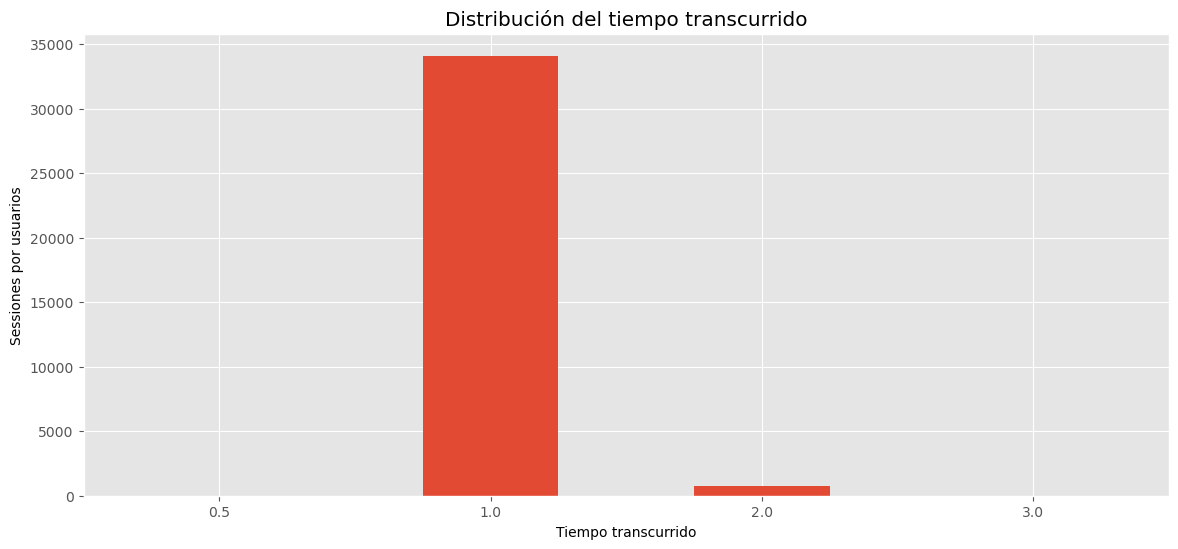

In [359]:
#df_filtered = purchases_grouped_by_cohorts.groupby(['time_per_user'])['first_session_date'].count()
#df_filtered.plot(kind='bar', rot= 0, title='Distribución del tiempo transcurrido', ylabel='Sessiones', xlabel='Tiempos', figsize=(14, 6))

df_filtered = purchases_grouped_by_cohorts.groupby(['time_per_user'])['first_session_month'].count()
df_filtered.plot(kind='bar', rot= 0, title='Distribución del tiempo transcurrido', ylabel='Sessiones por usuarios', xlabel='Tiempo transcurrido', figsize=(14, 6))

In [355]:
# Distribución del tiempo transcurrido entre el registro y la conversión

#plt.style.use('ggplot')

#plt.figure()
#sns.countplot(y = "time_per_user", data = purchases_grouped_by_cohorts, color = "c").set(title='Distribución del tiempo transcurrido entre el registro y la conversión')
#plt.xlabel("Cantidad de usuarios")
#plt.ylabel("Ventas de video juegos")
#plt.title("Distribución del tiempo") 
#plt.legend(title='Usuarios')
#plt.show()

#plt.style.use('ggplot')
#purchases_grouped_by_cohorts['time_per_user'].plot(kind='bar', rot=0, title='tiempo transcurrido entre el registro y la conversión', ylabel='Tiempo', xlabel='Usuarios', figsize=(14, 6))

El tiempo promedio que transcurre entre el registro del usuario y la conversión es de 1.02 meses. Del gráfico se puede apreciar que en la mayoría de los usuarios el tiempo de espera de 1 mes, mientras que existe una minoría de usuarios que les toma hasta 5 meses en hacer su compra.

In [178]:
#'purchase_dates_datetime', 'first_purchase_datetime'

#purchases_grouped_by_cohorts['cohort_previoustime'] = (purchases_grouped_by_cohorts['purchase_dates_datetime'] - purchases_grouped_by_cohorts['first_purchase_datetime'])
#purchases_grouped_by_cohorts['cohort_previoustime'] = purchases_grouped_by_cohorts['cohort_previoustime'] / np.timedelta64(1, 'M')
#purchases_grouped_by_cohorts['cohort_previoustime'] = (purchases_grouped_by_cohorts['cohort_previoustime'].round().astype('int'))
#purchases_grouped_by_cohorts['cohort_previoustime']

#lifetime_pivot = purchases_grouped_by_cohorts.pivot_table(index='first_purchase_datetime',  columns='cohort_previoustime', values='time_per_user', aggfunc='mean')  

#lifetime_pivot

In [190]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?

sessions_grouped_by_purchase_date['purchase_year'] = sessions_grouped_by_purchase_date['date_of_purchase'].dt.year
#sessions_grouped_by_purchase_date.groupby(['purchase_year', 'purchase_month'])['purchase_month'].mean()
sessions_grouped_by_purchase_date

,first_session_date,date_of_purchase,source_id,uid,first_session_month,purchase_month,time_in_between,purchase_year
0,2017-06-01 00:09:00,2017-06-01 00:10:00,1,1,6,6,-1 days +23:59:00,2017
1,2017-06-01 00:14:00,2017-06-01 00:25:00,1,1,6,6,-1 days +23:49:00,2017
2,2017-06-01 00:14:00,2017-06-01 00:29:00,1,1,6,6,-1 days +23:45:00,2017
3,2017-06-01 00:25:00,2017-06-01 00:27:00,1,1,6,6,-1 days +23:58:00,2017
4,2017-06-01 01:18:00,2017-07-21 14:56:00,4,1,6,7,-51 days +10:22:00,2017
...,...,...,...,...,...,...,...,...
36455,2018-05-31 23:26:00,2018-05-31 23:42:00,1,1,5,5,-1 days +23:44:00,2018
36456,2018-05-31 23:31:00,2018-05-31 23:36:00,1,1,5,5,-1 days +23:55:00,2018
36457,2018-05-31 23:35:00,2018-05-31 23:40:00,1,1,5,5,-1 days +23:55:00,2018
36458,2018-05-31 23:52:00,2018-05-31 23:54:00,1,1,5,5,-1 days +23:58:00,2018


<Axes: title={'center': 'Cantidad de compras por meses'}, xlabel='Meses', ylabel='Cantidad de compras'>

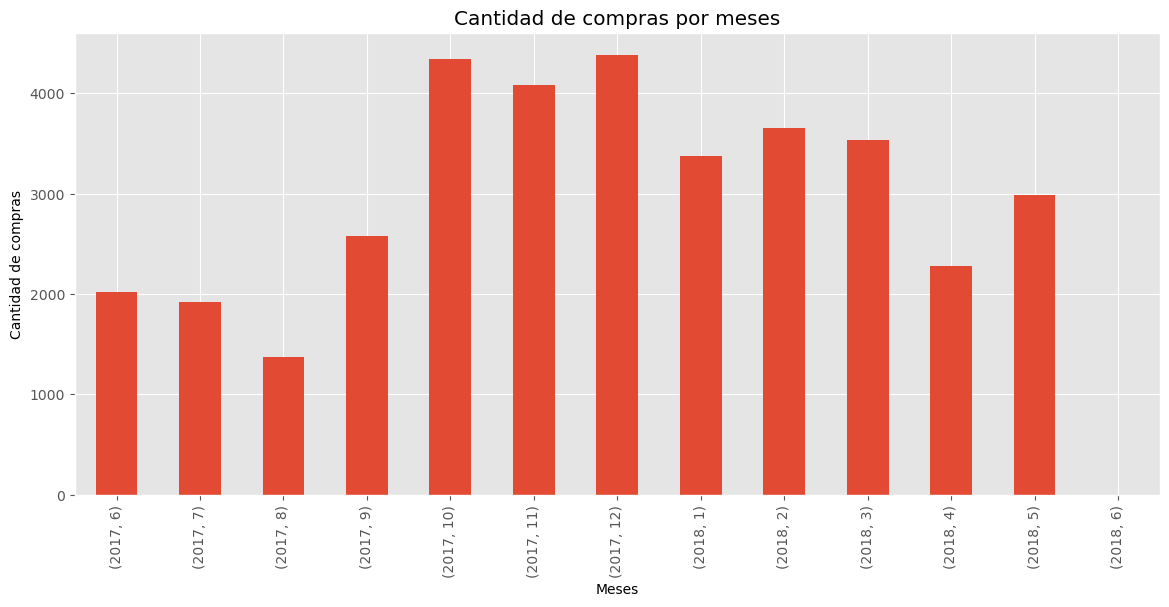

In [193]:
plt.style.use('ggplot')
dfg = sessions_grouped_by_purchase_date.groupby(['purchase_year', 'purchase_month'])['uid'].sum()
dfg.plot(kind='bar', title='Cantidad de compras por meses', ylabel='Cantidad de compras', xlabel='Meses', figsize=(14, 6))

Se puede apreciar del gráfico anterior, que en los meses de octubre y diciembre del 2017 se producen las mayores compras, siendo estas por valor de 4383, mientras que en agosto del mismo año por valor de 1370 siendo este el menor valor. 

In [316]:
# Hallar promedio de compras 
dfg.mean()

47018.80285714285

Tomando en cuenta el período de datos que se tiene, en promedio, se realizan 2809 compras mensuales.  

In [197]:
# Hallar el LTV

#Es útil encontrar el LTV para diferentes cohortes. Repasemos lo que tenemos que hacer:
#1.	encontrar la fecha de la primera compra de cada cliente;
#2.	calcular el número de nuevos clientes para cada fecha (o rango de fechas, en este caso, para cada mes);
#3.	añadir el mes del primer pedido a la tabla de pedidos;
#4.	agrupar la tabla y calcular los ingresos.

In [202]:
df_marketing_orders['order_month'] = df_marketing_orders['buy_ts'].dt.month
df_marketing_cost['month'] = df_marketing_cost['dt'].dt.month

first_orders = df_marketing_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

,uid,first_order_month
0,313578113262317,1
1,1575281904278712,6
2,2429014661409475,10
3,2464366381792757,1
4,2551852515556206,11


In [204]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,1,3898
1,2,4054
2,3,3856
3,4,2445
4,5,3194


In [210]:
df_marketing_orders_ = pd.merge(df_marketing_orders, first_orders, on='uid')
df_marketing_orders_.head() 

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,6


In [211]:
cohorts = df_marketing_orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,1,1,19417.13
1,1,2,8275.63
2,1,3,7970.76
3,1,4,3697.85
4,1,5,2676.91


In [212]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

,first_order_month,n_buyers,order_month,revenue
0,1,3898,1,19417.13
1,1,3898,2,8275.63
2,1,3898,3,7970.76
3,1,3898,4,3697.85
4,1,3898,5,2676.91


In [244]:
margin_rate = 0.4
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M').astype('int64') 
report['age'] = report['age'].round().astype('int')
report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,1,3898,1,19417.13,7766.852,0,2.490653
1,1,3898,2,8275.63,3310.252,1,1.061523
2,1,3898,3,7970.76,3188.304,2,1.022417
3,1,3898,4,3697.85,1479.140,3,0.474327
4,1,3898,5,2676.91,1070.764,4,0.343370


In [254]:
report.tail(25) 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
53,6,1865,9,294.79,117.916,3,0.063226
54,6,1865,10,275.81,110.324,4,0.059155
55,6,1865,11,222.68,89.072,5,0.047760
56,6,1865,12,114.57,45.828,6,0.024573
57,7,1796,7,10405.79,4162.316,0,2.317548
58,7,1796,8,319.00,127.600,1,0.071047
59,7,1796,9,436.92,174.768,2,0.097310
60,7,1796,10,394.43,157.772,3,0.087846
61,7,1796,11,139.95,55.980,4,0.031169
62,7,1796,12,136.21,54.484,5,0.030336


In [247]:
report['ltv'] = report['gp'] / report['n_buyers']
report['ltv']

0     1.992522
1     0.849218
2     0.817933
3     0.379461
4     0.274696
        ...   
73    0.120125
74    0.043303
75    2.021498
76    0.073619
77    1.766315
Name: ltv, Length: 78, dtype: float64

Hasta aquí se ha calculado el LTV. 

<Axes: title={'center': 'Reporte del LTV calculado'}, xlabel='Meses', ylabel='Cantidad de compras'>

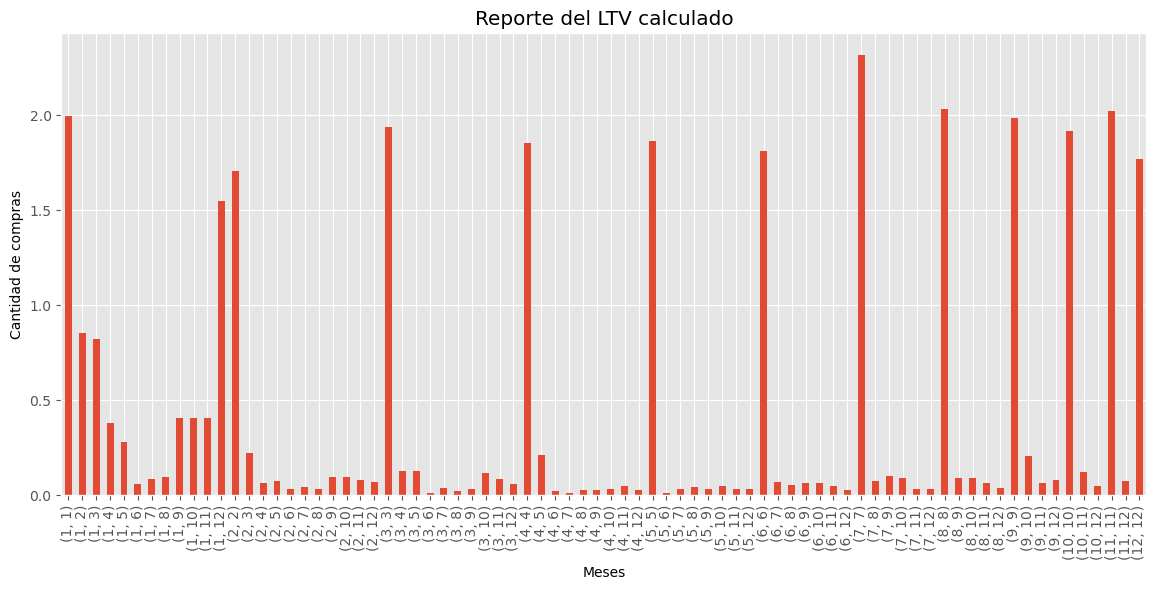

In [252]:
plt.style.use('ggplot')
dfg = report.groupby(['first_order_month','order_month'])['ltv'].sum()
dfg.plot(kind='bar', title='Reporte del LTV calculado', ylabel='Cantidad de compras', xlabel='Meses', figsize=(14, 6))

De gráfico anterior se observa que el LTV más alto corresponde al mes 7, en el que se registra un valor de 2.317 y 7 órdenes, con 1796 compradores, y es el período en el que se aportó más dinero por parte de los clientes. 

### Marketing

In [262]:
# Cuanto dinero se gastó en marketing

df_marketing_cost.tail(5)

,source_id,dt,costs,month
2537,10,2018-05-27,9.92,5
2538,10,2018-05-28,21.26,5
2539,10,2018-05-29,11.32,5
2540,10,2018-05-30,33.15,5
2541,10,2018-05-31,17.60,5


In [269]:
monthly_costs = df_marketing_cost.groupby(['source_id', 'month'])['costs'].sum()
df_marketing_cost['source_id'].nunique()

7

In [275]:
mis_booleans =  df_marketing_cost['source_id'] == 10
df_new = df_marketing_cost[mis_booleans].groupby(['month'])['costs'].sum()
df_new

month
1     614.35
2     480.88
3     526.41
4     388.25
5     409.86
6     314.22
7     329.82
8     232.57
9     460.67
10    627.24
11    792.36
12    645.86
Name: costs, dtype: float64

<Axes: title={'center': 'Costos totales por fuente de publicidad'}, xlabel='Cada fuente de publicidad por mes', ylabel='Costos'>

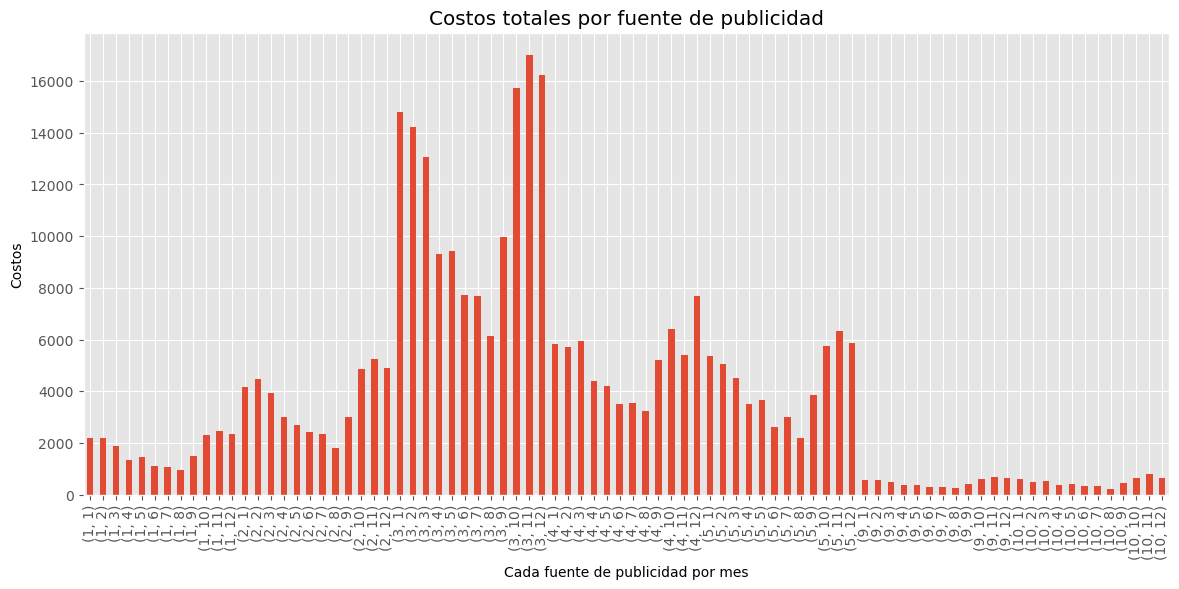

In [371]:
plt.style.use('ggplot')
#dfg = monthly_costs.groupby(['first_order_month','order_month'])['ltv'].sum()
dfg = df_marketing_cost.groupby(['source_id', 'month'])['costs'].sum()
dfg.plot(kind='bar', title='Costos totales por fuente de publicidad', ylabel='Costos', xlabel='Cada fuente de publicidad por mes', figsize=(14, 6))

Se aprecia del gráfico anterior que de las 7 fuentes existentes, la número 3 es la que engloba los mayores costos en el mes de  noviembre por valor de 17025.34, mientras que la fuente 10 es la que menos costo registró con 232.57

In [367]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head(5) 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,1,3898,1,19417.13,7766.852,0,1.992522,2186.18,0.560847
1,1,3898,1,19417.13,7766.852,0,1.992522,4157.74,1.066634
2,1,3898,1,19417.13,7766.852,0,1.992522,14808.78,3.799071
3,1,3898,1,19417.13,7766.852,0,1.992522,5832.79,1.496355
4,1,3898,1,19417.13,7766.852,0,1.992522,5371.52,1.378019


In [369]:
result = report_.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5]

print('El LTV promedio durante 6 meses desde el primer pedido:', m6_cum_ltv)

El LTV promedio durante 6 meses desde el primer pedido: 2.5182494263523263


In [370]:
m7_cum_cac = result.cumsum(axis=1).mean(axis=0)[7]

print('El CAC promedio es de:', m7_cum_cac)

El CAC promedio es de: 2.6943813889818595


La métrica LTV (o la adquisición de cada cliente) tiene un valor de 2518.2, por su parte, en la métrica CAC se obtiene el valor de 2694.3 , y tomando en cuenta que lo deseable es tener un valor de LTV mayor al CAC, lo cual sería indicativo de una economía unitaria por cliente sólida, entonces, en este caso particular, se aprecia existen algunos problemas al interior de la empresa, ya que adquirir un cliente está costando más que lo aportado por este.        

In [280]:
# Cálculo del ROI, 
#Se tiene que ROI = ( benef neto - inversiones ) / inversiones
# En la práctica el ROMI se calcula como el benef bruto / gastos

#report_['romi'] = report_['ltv'] / report_['cac']

# Primero se halla el total invertido por fuente

#report_['roi'] = report_['ltv'] / report_['cac']

dfg = df_marketing_cost.groupby(['source_id'])['costs'].sum()
dfg

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [283]:
# Segundo se hayan los ingresos por fuente

#df_marketing_visits 
#df_marketing_orders['revenue'].sum()
df_marketing_orders['uid'].nunique()

36523

In [295]:
df_marketing_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date_start',
       'session_week', 'year_start', 'month_start', 'session_date',
       'duration_session_min_end', 'duration_session_min_start',
       'duration_session', 'session_year', 'first_session_date',
       'date_of_purchase'],
      dtype='object')

In [292]:
df_marketing_orders.head(5)

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,6


In [290]:
df_marketing_visits['source_id'].nunique()
#df_marketing_visits.columns

9

In [297]:
#pd.merge(df_marketing_orders, df_marketing_visits[["source_id"]], on="uid", how="left")

df_revenue_per_source = df_marketing_orders.merge(df_marketing_visits, on='uid', how='left')

#df_marketing_visits = df_marketing_visits.merge(date_of_purchase, on='uid', how='left')
df_revenue_per_source.columns
df_revenue_per_source.head(5)

,buy_ts,revenue,uid,order_month,device,end_ts,source_id,start_ts,date_start,session_week,year_start,month_start,session_date,duration_session_min_end,duration_session_min_start,duration_session,session_year,first_session_date,date_of_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,22,2017,6,1,11,9,2,2017,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,25,14,11,2017,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,22,2017,6,1,34,25,9,2017,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,33,14,19,2017,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,22,2017,6,1,59,31,28,2017,2017-06-01 07:31:00,2017-06-01 07:58:00


In [331]:
dfg1 = df_revenue_per_source.groupby(['source_id'])['revenue'].sum()
dfg1

source_id
1     2298200.17
2     2638189.21
3      296687.96
4      496690.17
5     1181477.14
7           1.22
9       36342.25
10      14619.23
Name: revenue, dtype: float64

In [332]:
data = {'revenue': dfg1,
        'all_cost': dfg}

df_roi = pd.DataFrame(data)
df_roi 

,revenue,all_cost
source_id,,
1,2298200.17,20833.27
2,2638189.21,42806.04
3,296687.96,141321.63
4,496690.17,61073.60
5,1181477.14,51757.10
7,1.22,NaN
9,36342.25,5517.49
10,14619.23,5822.49


In [333]:
df_roi = df_roi.reset_index()
df_roi

,source_id,revenue,all_cost
0,1,2298200.17,20833.27
1,2,2638189.21,42806.04
2,3,296687.96,141321.63
3,4,496690.17,61073.60
4,5,1181477.14,51757.10
5,7,1.22,NaN
6,9,36342.25,5517.49
7,10,14619.23,5822.49


In [335]:
df_roi.set_index('source_id')

,revenue,all_cost
source_id,,
1,2298200.17,20833.27
2,2638189.21,42806.04
3,296687.96,141321.63
4,496690.17,61073.60
5,1181477.14,51757.10
7,1.22,NaN
9,36342.25,5517.49
10,14619.23,5822.49


In [380]:
df_roi['roi'] = (df_roi['revenue'] -  df_roi['all_cost']) /df_roi['all_cost']
df_roi = df_roi.set_index('source_id')
df_roi

,revenue,all_cost,roi
source_id,,,
1,2298200.17,20833.27,109.31
2,2638189.21,42806.04,60.63
3,296687.96,141321.63,1.10
4,496690.17,61073.60,7.13
5,1181477.14,51757.10,21.83
7,1.22,NaN,NaN
9,36342.25,5517.49,5.59
10,14619.23,5822.49,1.51


In [381]:
df_roi.round(2) 

,revenue,all_cost,roi
source_id,,,
1,2298200.17,20833.27,109.31
2,2638189.21,42806.04,60.63
3,296687.96,141321.63,1.10
4,496690.17,61073.60,7.13
5,1181477.14,51757.10,21.83
7,1.22,NaN,NaN
9,36342.25,5517.49,5.59
10,14619.23,5822.49,1.51


Al observar la tabla anterior, se aprecia que la primera fuente tiene la mayor Rentabilidad de la inversión en marketing (ROI) en la empresa, lo cual queda mejor ilustrado en el gráfico siguiente.

<Axes: title={'center': 'Comportamiento de Rentabilidad de la inversión'}, xlabel='Fuentes', ylabel='Aportación'>

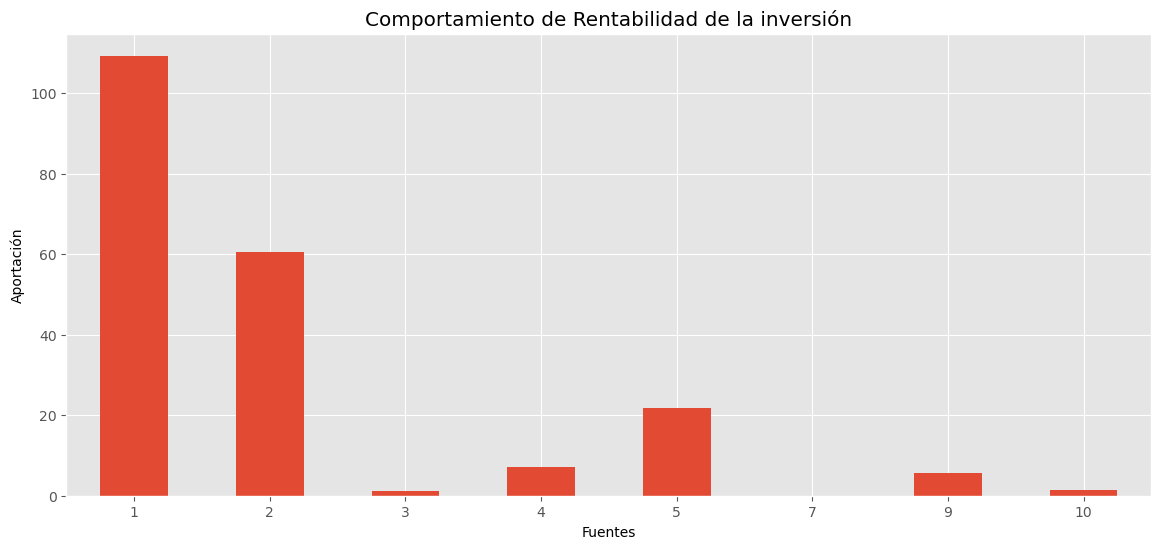

In [382]:
# Mostrando las diferencias por fuentes de anuncios 

plt.style.use('ggplot')
df_roi['roi'].plot(kind='bar', rot=0, title='Comportamiento de Rentabilidad de la inversión', ylabel='Aportación', xlabel='Fuentes', figsize=(14, 6))

In [318]:
# Mostrando las diferencias por dispositivos

dfg1 = df_revenue_per_source.groupby(['device'])['revenue'].sum()
dfg1

device
desktop    6447893.99
touch       514313.36
Name: revenue, dtype: float64

In [319]:
df_revenue_per_source.head(5)

,buy_ts,revenue,uid,order_month,device,end_ts,source_id,start_ts,date_start,session_week,year_start,month_start,session_date,duration_session_min_end,duration_session_min_start,duration_session,session_year,first_session_date,date_of_purchase
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,22,2017,6,1,11,9,2,2017,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,25,14,11,2017,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,22,2017,6,1,34,25,9,2017,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,22,2017,6,1,33,14,19,2017,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,22,2017,6,1,59,31,28,2017,2017-06-01 07:31:00,2017-06-01 07:58:00


NOTA: Se especifica que el margen de beneficio utilizado para el cálculo del LTV fue del 40 %

## Observaciones y recomendaciones

Tras los resultados obtenidos de las métricas calculadas, se llegan a las siguientes recomendaciones:

1. La fuente 1 es la que mejor desempeño tiene en la métrica ROI, por ende, mejor Rentabilidad de la inversión en marketing, tras lo cual se recomienda hacer un énfasis en ésta fuente para continuar desarrollando la misma, mientras que la fuente 7 mostró la menor rentabilidad de todas. 

2. El tiempo promedio que transcurre entre el registro del usuario y la conversión es de 1.02 meses. 

3. Adicionalmente, se observó que de las 7 fuentes existentes, la número 3 es la que engloba los mayores costos en el mes de  noviembre por valor de 17025.34, mientras que la fuente 10 es la que menos costo registró con 232.57

4. En términos de las ventas, el mayor valor "de vida" de los clientes o LTV (lifetime value por sus siglas en inglés), ocurrió en el mes 7 con 7 órdenes. 

5. Se obtuvo que la métrica LTV tiene un valor de 2518.2, y para la métrica CAC se obtiene el valor de 2694.3, lo cual no es lo deseable, porque adquirir un cliente está costando más que lo aportado por este, luego se recomienda disminuir los costos de adquisición por cliente.      

6. De la métrica ROI, se aprecia que la primera fuente tiene la mayor Rentabilidad de la inversión en marketing (ROI) en la empresa por valor de 109.3

## Conclusión

Luego de analizadas todas las métricas se concluye que la empresa debe priorizar y enfocar su atención en la fuente 1 ya que:
-posee el mejor comportamiento en el indicador ROI
-en términos de costos 

Como recomendación general, se debe evaluar realizar campañas publicitarias en el mes de octubre y diciembre, dado que son los meses de mayor volúmen de compras de los clientes, o realizar la campaña de publicidad en el mes anterior para ir motivando y despertando el interés en el cliente e ir logrando el posicionamiento del producto. Además, se debe seguir desarrollando la fuente de anuncios 1. que es la que posee una favorable relación entre la métrica Rentabilidad (ROI) y el costo.